 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

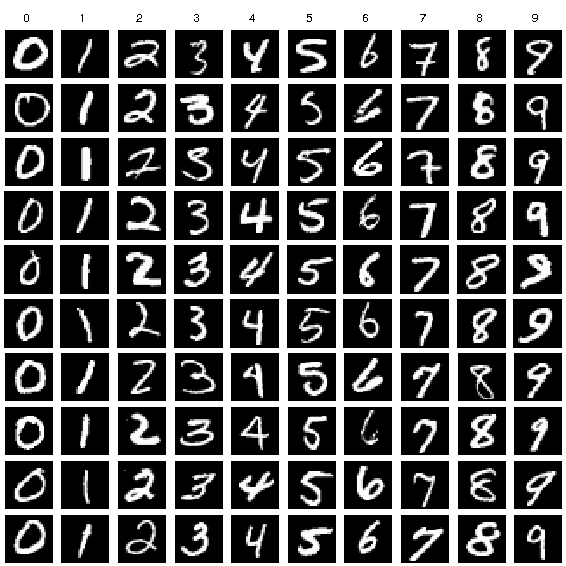

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

font = {'weight':'bold', 'size':12}
matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 1.2 Dataset examination

Using the following code, display random images,

In [3]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
    index = np.array(len(x_data))
    selected_ind = np.random.choice(index, count)

    selected_img = x_data[selected_ind]
    selected_labels = y_data[selected_ind]
    concat_img = np.concatenate(selected_img, axis=1)
    
    plt.figure(figsize=(20,10))
    plt.imshow(concat_img, cmap="gray")

    for id_label, label in enumerate(selected_labels):
        plt.text(14 + 28*id_label, 28*(5/4), label)
    plt.axis('off')
    plt.show()

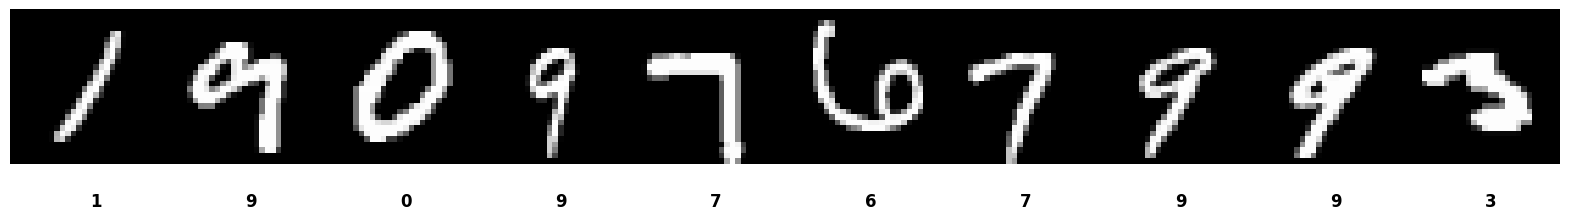

In [4]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset? <span style="color:blue">2D gray Image of digits between 0 and 9 </span>
- How many data samples do we have in train and test datasets? <span style="color:blue">6000 images with 28 columns</span>
- How many colour channels does the input variable have? <span style="color:blue">We have 3 scales</span>
- What is the size of the input images? <span style="color:blue">Image size: (28, 28)</span>
- What is the necessary preprocessing of the input data X? <span style="color:blue">Normalize images</span>
- How many classes do we have in target variable? <span style="color:blue">10 class for each digit</span>
- What is the necessary preprocessing of target variable y? <span style="color:blue">Do the encoding</span>

In [5]:
print("Number of data samples in train and test datasets:", X_train.shape, X_test.shape)
print("Image size:", X_train[0].shape)

Number of data samples in train and test datasets: (60000, 28, 28) (10000, 28, 28)
Image size: (28, 28)


#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [6]:
# Normalize the images to a range of 0 to 1
X_train = X_train.astype('float') / 255
X_test = X_test.astype('float') / 255

# Reshape the data to add a channel dimenssion (for CNN input)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

- Input_layer 
- -> Convolutional_layer(kernel_size=(3,3), no_channels=32)
- -> Maxpooling_layer(kernel_size=(2, 2))
- -> Flatten_layer
- -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\myPrograms\Python 3.12\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem 

In [8]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8717 - loss: 0.4358 - val_accuracy: 0.9728 - val_loss: 0.0885
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9778 - loss: 0.0769 - val_accuracy: 0.9814 - val_loss: 0.0565
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9856 - loss: 0.0498 - val_accuracy: 0.9822 - val_loss: 0.0533
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9899 - loss: 0.0330 - val_accuracy: 0.9851 - val_loss: 0.0442
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9919 - loss: 0.0265 - val_accuracy: 0.9863 - val_loss: 0.0411
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9950 - loss: 0.0185 - val_accuracy: 0.9857 - val_loss: 0.0442
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9961 - loss: 0.0139 - val_accuracy: 0.9856 - val_loss: 0.0471
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9971 - loss: 0.0099 - val_accuracy: 0.

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

Loss 0.04%
Accuracy 98.69%


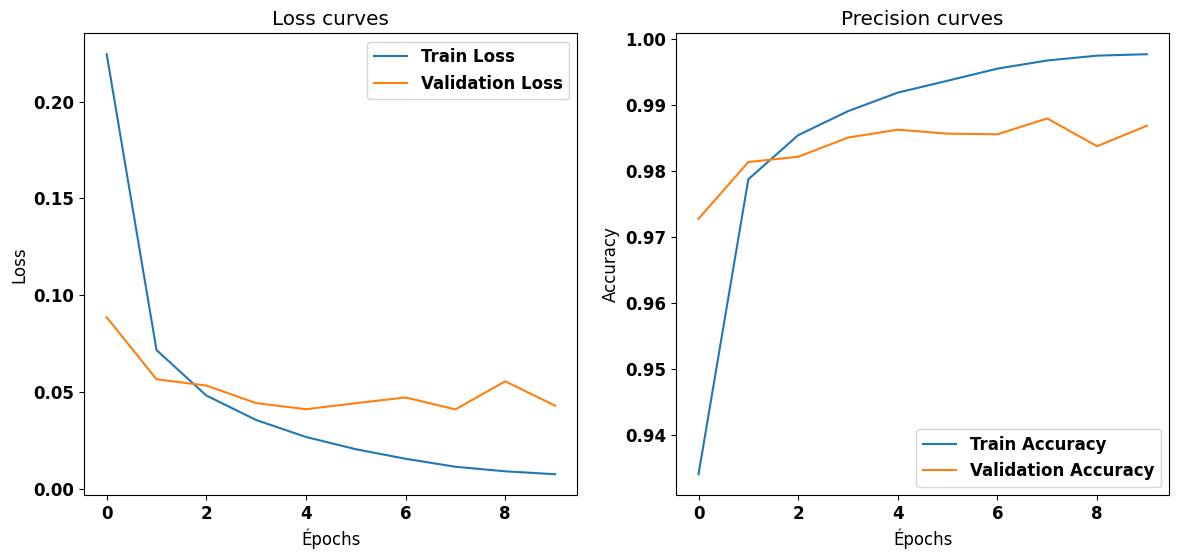

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Loss {:.2F}".format(score[0]))
print("Accuracy {:.2F}%".format(score[1]*100))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss curves')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Precision curves')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


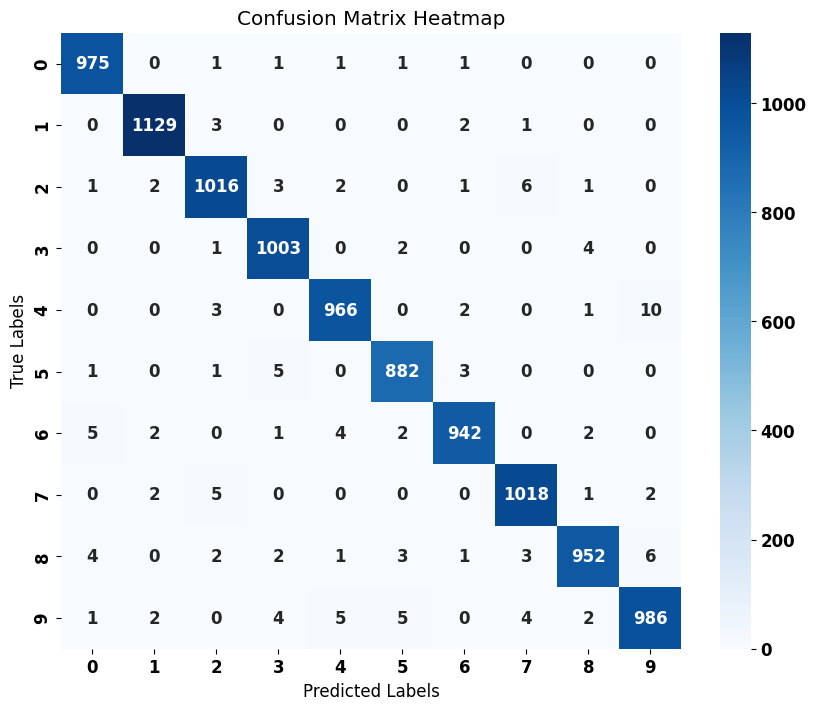

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

label = [str(i) for i in range(10)]

# Generating predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label, yticklabels=label)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

In [ ]:
from tensorflow.keras.regularizers import l1, l2

### Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Preprocessing
# Normalize the images to a range of 0 to 1
X_train = X_train.astype('float') / 255
X_test = X_test.astype('float') / 255
# Reshape the data to add a channel dimenssion (for CNN input)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
# One-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Model Creation
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax'))

### Model Run
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1, callbacks=[early_stopping])

### Model Evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print("Loss {:.2F}".format(score[0]))
print("Accuracy {:.2F}%\n".format(score[1]*100))

# Confusion matrix
label = [str(i) for i in range(10)]
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion matrix:")
print(conf_matrix, "\n")

# Classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

C:\myPrograms\Python 3.12\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8611 - loss: 0.6707 - val_accuracy: 0.9605 - val_loss: 0.2346
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9639 - loss: 0.2132 - val_accuracy: 0.9706 - val_loss: 0.1835
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9709 - loss: 0.1750 - val_accuracy: 0.9761 - val_loss: 0.1565
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9739 - loss: 0.1591 - val_accuracy: 0.9758 - val_loss: 0.1571
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9764 - loss: 0.1439 - val_accuracy: 0.9768 - val_loss: 0.1444
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9780 - loss: 0.1396 - val_accuracy: 0.9772 - val_loss: 0.1400
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9797 - loss: 0.1302 - val_accuracy: 0.9778 - val_loss: 0.1365
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9811 - loss: 0.1202 - val_accu